## Prediction of level of depression of individuals
--by Anil, Jignesh & Rathan

### Abstract
This project aims to develop a machine-learning model that can classify an individual's depression state using other variables. We are using a dataset called Depression.csv, which has 16 features. The target feature of our project is the depression state of the individual, and we aim to accurately predict the level of depression (no depression, mild depression, moderate depression, severe depression) based on other features. Our approach involves preprocessing the data to handle missing values, scaling features for optimal model performance, and training and validating the model using robust machine-learning techniques. The successful implementation of this model could enhance mental health monitoring and support, contributing to better mental health outcomes.


### Introduction
Nowadays, Depression is one of the significant problems for many people, mainly Adults. It affects a person's mental health, resulting in anxiety, panic attacks, and damage to physical health. Detection of Depression is essential, as well as providing the proper treatment. Machine Learning (ML) is one of the emerging technologies that can help find hidden patterns in data using various techniques. This project aims to apply one of those machine learning (ML) techniques to develop a model that can classify the state of the Depression based on its severity.


### MethodsIn this project, we used many methodologies to build a reliable model for classifying the depression state. Firstly, we mapped the target variable string values to the numeric values: 0 for 'no depression,' 0 for 'mild depression,' 1 for 'moderate depression,' and 1 for 'severe depression.' Next, we used StandardScaler to scale the features so that each column contributes equally to the model prediction. Scaling is vital in classification, as it helps arrange the data within the same range. As our model mainly focuses on classification, we utilized a Support Vector Classifier (SVC), a classification model in Python from the sci-kit learn library. This library provides the implementation of this model simply and efficiently. We also used train_test_split from sklearn, which divides the data into train and test data. Finally, we used a confusion matrix to measure the model's accuracy, making detecting errors easy. The rows of this matrix represent the actual outcomes, whereas the columns represent the predictions of our model..


### Data Procurement:
Kaggle is one of the open-source platforms for extensive collections of data sets. We downloaded our data set from Kaggle, which provided relevant and adequate information for training our model.


# Big Data Analytics Life Cycle

### Stage1: Business Case Evaluation
The goal of our project is to identify the depression state of an individual based on other column values

### Stage2: Data Identification
We collected our dataset from Kaggle website which is an internal souurce

### Stage3: Data Acquisition and Filtering


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv("/Users/rathanrajdasari/Downloads/Big Data/csvs/Deepression.csv")

In [3]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [4]:
df['Depression State'].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression', nan], dtype=object)

In [5]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(540, 16)

In [8]:
df['Depression State'].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression'], dtype=object)

In [9]:
df[df['Depression State']=='5\tNo depression']

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
491,492,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,5\tNo depression


In [10]:
df=df.dropna()

### Stage4: Data Extraction
As our target variable is in object type we mapped those values to numbers to make it more compatible

In [11]:
maps={"Mild":0,"Moderate":1,"Severe":1,"No depression":0,"\tModerate":1,"\tNo depression":0,"\tSevere":1,"2\tNo depression":0,"5\tNo depression":0}

In [12]:
df['Depression State']=df['Depression State'].map(maps)

In [13]:
df

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,0.0
536,537,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
537,538,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0,0.0
538,539,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
df['Depression State'].unique()

array([ 0.,  1., nan])

In [15]:
df.shape

(540, 16)

In [16]:
df.isnull().sum()

Number                0
Sleep                 0
Appetite              0
Interest              0
Fatigue               0
Worthlessness         0
Concentration         0
Agitation             0
Suicidal Ideation     0
Sleep Disturbance     0
Aggression            0
Panic Attacks         0
Hopelessness          0
Restlessness          0
Low Energy            0
Depression State     11
dtype: int64

In [17]:
df['Depression State'].describe()

count    529.000000
mean       0.449905
std        0.497955
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Depression State, dtype: float64

In [18]:
import matplotlib.pyplot as plt

(array([291.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 238.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

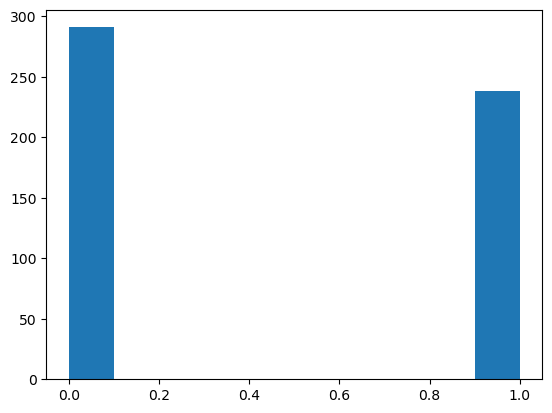

In [19]:
plt.hist(x=df['Depression State'])

### Imputation

In [20]:
df.fillna(method='ffill',inplace=True)

/var/folders/6t/wzrslr3s4js4hr_8wrwhk1p40000gn/T/ipykernel_17788/4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [21]:
df.isnull().sum()

Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64

(array([298.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

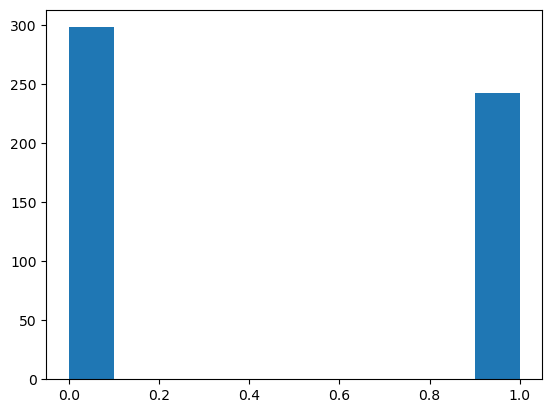

In [22]:
plt.hist(x=df['Depression State'])

### Stage5: Data Validation and Cleansing
As the 'Number' column is the id of the data frame and as it does not contribute anything to the target variable, we are deleting it

In [23]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [24]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

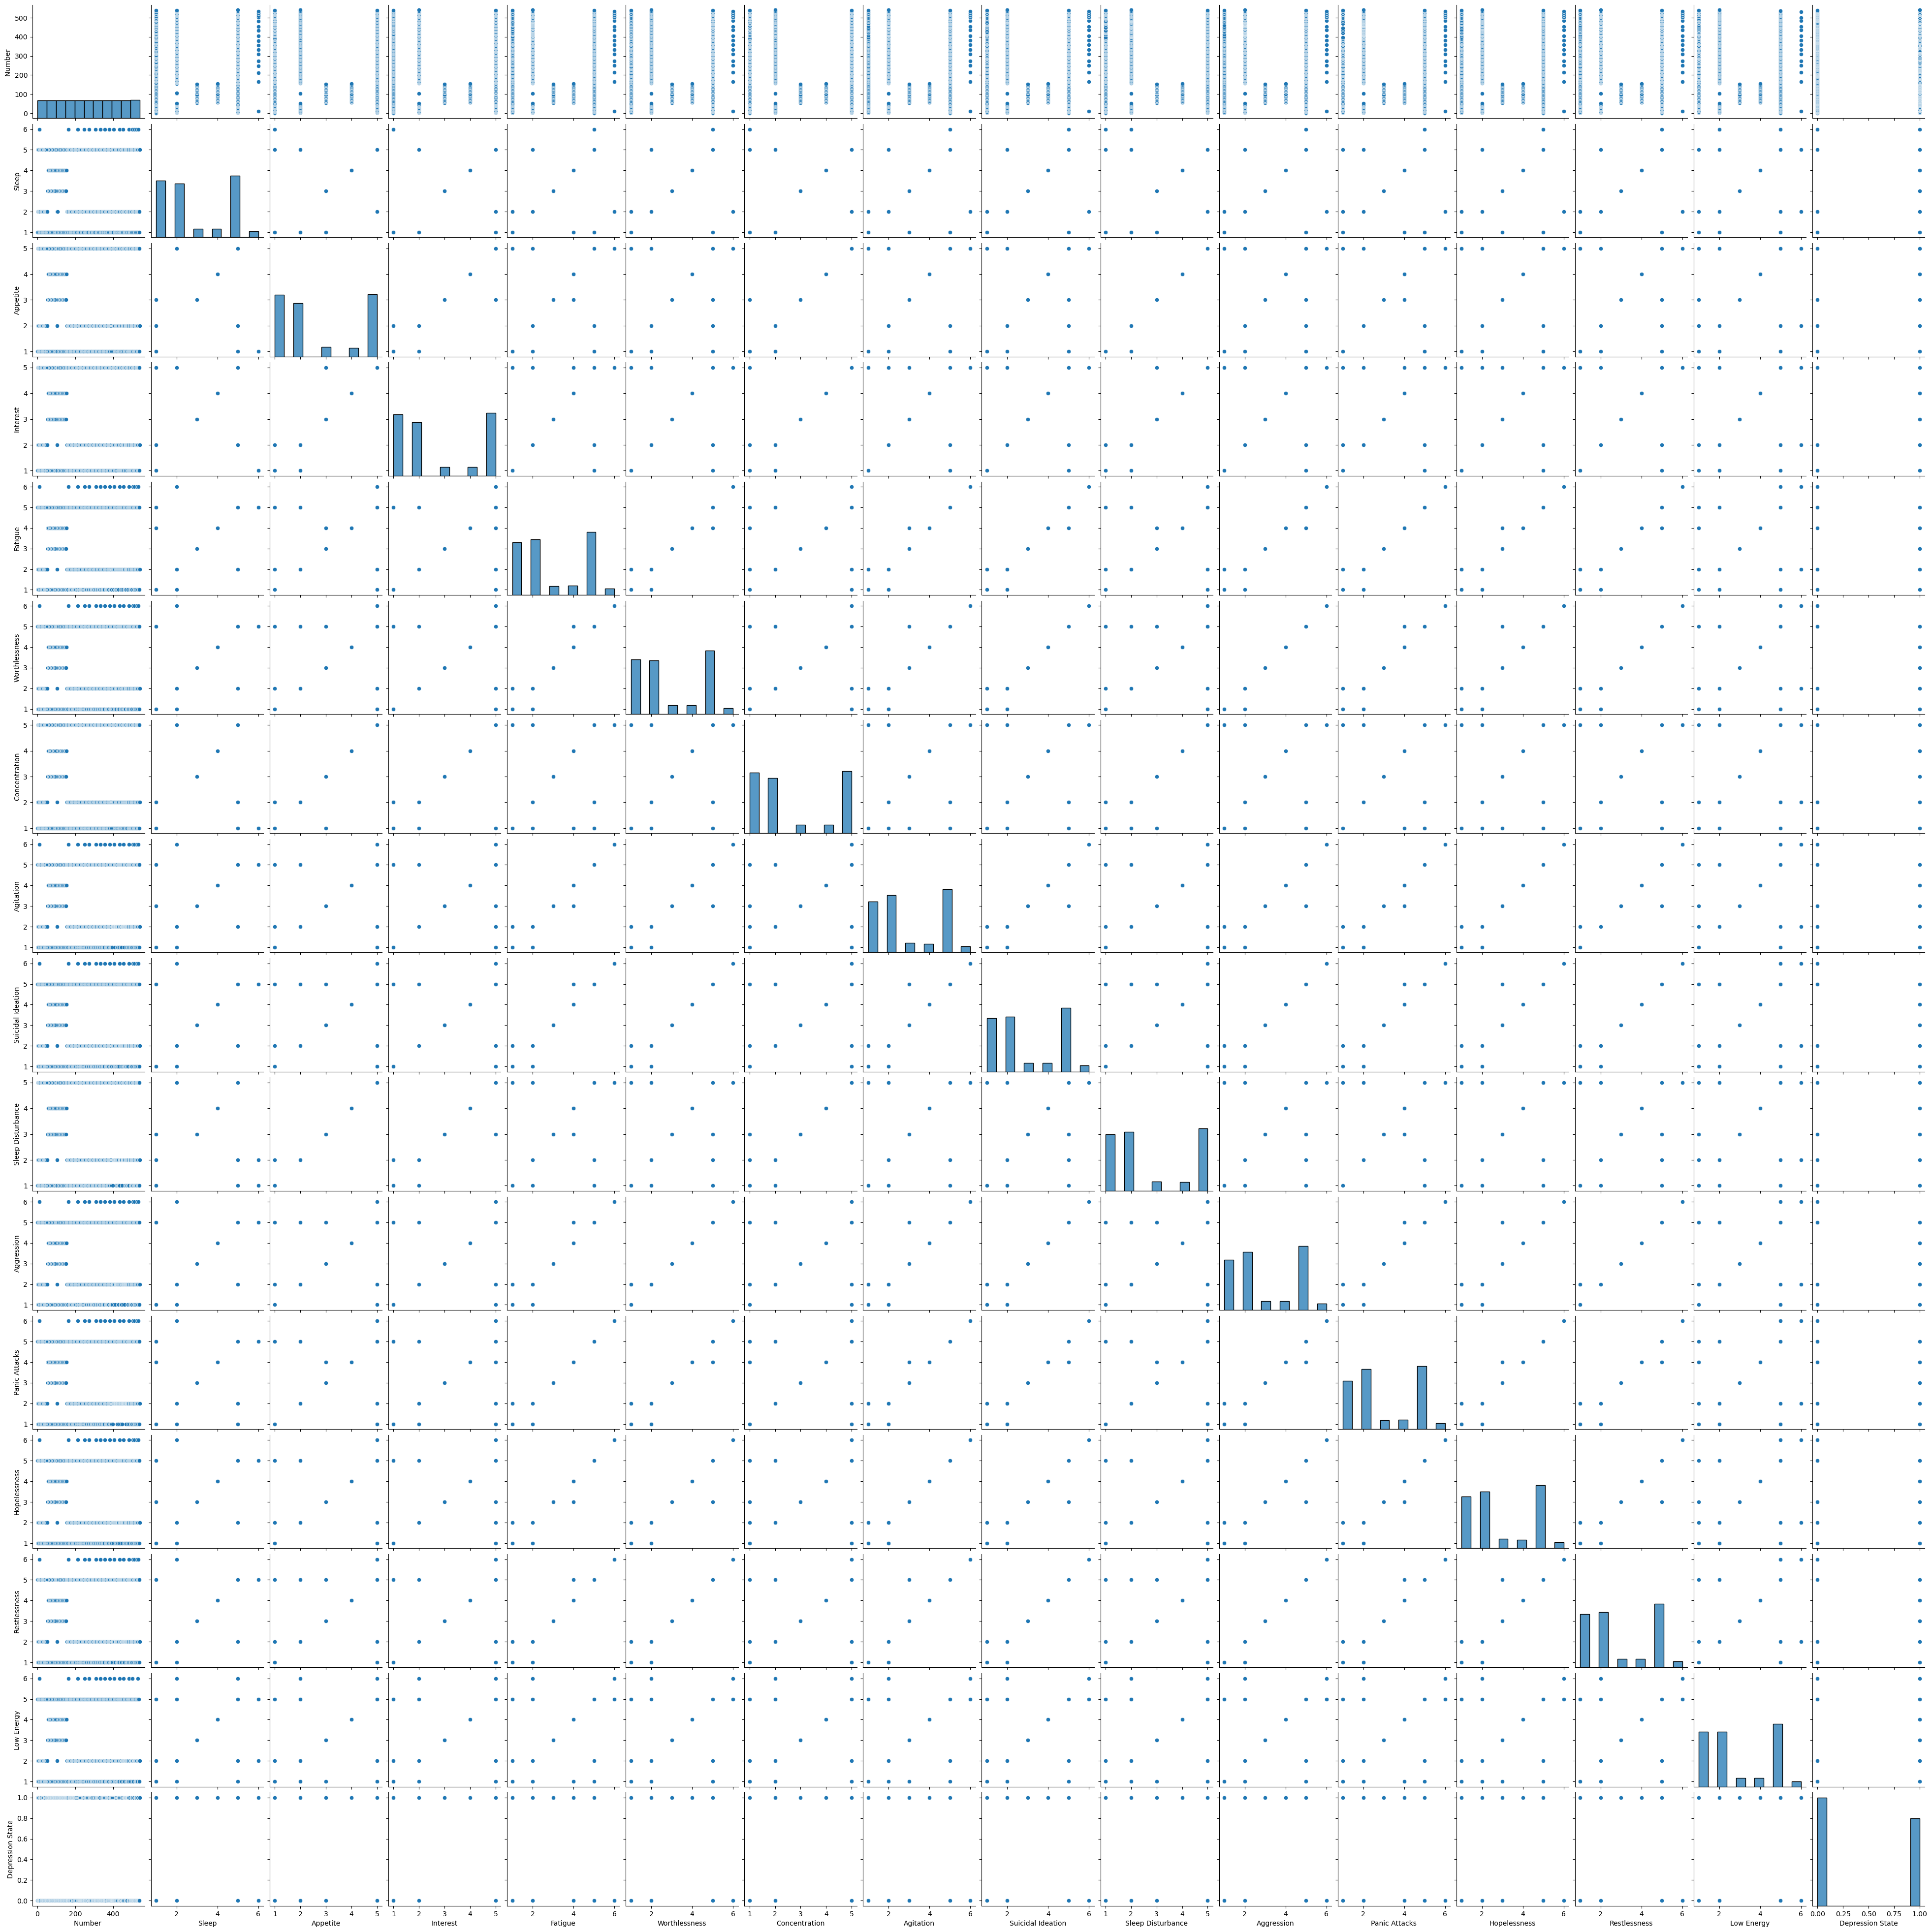

In [25]:
sns.pairplot(df)

In [26]:
col=['Depression State','Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy']

In [27]:
dff=df[col]

In [28]:
dff.corr()

,Depression State,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
Depression State,1.000000,0.079464,0.081809,0.073137,-0.158560,-0.159991,0.088599,-0.156856,-0.162271,0.077683,-0.158234,-0.156796,-0.158956,-0.162271,-0.102777
Sleep,0.079464,1.000000,0.017551,0.017715,-0.195636,-0.193198,0.017574,-0.196377,-0.196141,0.006946,-0.202111,-0.208419,-0.194885,-0.196141,-0.182634
Appetite,0.081809,0.017551,1.000000,0.994746,-0.414216,-0.419400,0.996031,-0.410577,-0.415234,0.995513,-0.406849,-0.396385,-0.412680,-0.415234,-0.306502
Interest,0.073137,0.017715,0.994746,1.000000,-0.414076,-0.416679,0.985510,-0.413030,-0.412540,0.990178,-0.404210,-0.397665,-0.415110,-0.412540,-0.314272
Fatigue,-0.158560,-0.195636,-0.414216,-0.414076,1.000000,0.996332,-0.412197,0.993143,0.996290,-0.400767,0.996299,0.995116,0.995017,0.995051,0.869691
Worthlessness,-0.159991,-0.193198,-0.419400,-0.416679,0.996332,1.000000,-0.419955,0.993269,0.997556,-0.406082,0.996425,0.991580,0.993869,0.997556,0.868107
Concentration,0.088599,0.017574,0.996031,0.985510,-0.412197,-0.419955,1.000000,-0.405964,-0.415784,0.991473,-0.407388,-0.394313,-0.408079,-0.415784,-0.296638
Agitation,-0.156856,-0.196377,-0.410577,-0.413030,0.993143,0.993269,-0.405964,1.000000,0.991947,-0.397038,0.993127,0.995661,0.996874,0.995680,0.872934
Suicidal Ideation,-0.162271,-0.196141,-0.415234,-0.412540,0.996290,0.997556,-0.415784,0.991947,1.000000,-0.401866,0.993847,0.991424,0.993809,0.996297,0.866464
Sleep Disturbance,0.077683,0.006946,0.995513,0.990178,-0.400767,-0.406082,0.991473,-0.397038,-0.401866,1.000000,-0.393379,-0.382716,-0.399166,-0.401866,-0.293967


In [29]:
col=['Sleep', 'Appetite', 'Interest',
       'Concentration', 'Agitation', 'Sleep Disturbance', 'Panic Attacks', 'Hopelessness',
       'Low Energy']

In [30]:
dff

,Depression State,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
0,0.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
1,1.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0
2,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,0.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
4,1.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0
536,1.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
537,0.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0
538,1.0,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0


In [31]:
dff=df[col] # checking if inputs are co-linear to each other or not?
dff.corr()

,Sleep,Appetite,Interest,Concentration,Agitation,Sleep Disturbance,Panic Attacks,Hopelessness,Low Energy
Sleep,1.000000,0.017551,0.017715,0.017574,-0.196377,0.006946,-0.208419,-0.194885,-0.182634
Appetite,0.017551,1.000000,0.994746,0.996031,-0.410577,0.995513,-0.396385,-0.412680,-0.306502
Interest,0.017715,0.994746,1.000000,0.985510,-0.413030,0.990178,-0.397665,-0.415110,-0.314272
Concentration,0.017574,0.996031,0.985510,1.000000,-0.405964,0.991473,-0.394313,-0.408079,-0.296638
Agitation,-0.196377,-0.410577,-0.413030,-0.405964,1.000000,-0.397038,0.995661,0.996874,0.872934
Sleep Disturbance,0.006946,0.995513,0.990178,0.991473,-0.397038,1.000000,-0.382716,-0.399166,-0.293967
Panic Attacks,-0.208419,-0.396385,-0.397665,-0.394313,0.995661,-0.382716,1.000000,0.995079,0.865539
Hopelessness,-0.194885,-0.412680,-0.415110,-0.408079,0.996874,-0.399166,0.995079,1.000000,0.871862
Low Energy,-0.182634,-0.306502,-0.314272,-0.296638,0.872934,-0.293967,0.865539,0.871862,1.000000


### Stage6: Data Aggregation and Representation
As we are dealing with only one dataset, this stage is skipped

### Stage7: Data Analysis
It includes finding correlation between the variables, target and numerical variables exploration, normalization, splitting the data, building a model and finding performance of the model.

In [32]:
col=['Sleep', 'Appetite', 'Interest',
       'Concentration', 'Agitation', 'Sleep Disturbance', 'Panic Attacks', 'Hopelessness',
       'Low Energy']
X=df[col]
y=df['Depression State']

### Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Scaling the data using StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

### Results

In [35]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')#, decision_function_shape='ovr')  # 'ovr' stands for one-vs-rest

# Train the SVM model
clf.fit(X_train, y_train)

# Cross-validation to evaluate the model
scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean():.2f}')

# Predict on the training data (for demonstration)
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.62068966 0.71264368 0.63953488 0.70930233 0.62790698]
Mean Cross-Validation Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.59      0.65        63
         1.0       0.55      0.71      0.62        45

    accuracy                           0.64       108
   macro avg       0.65      0.65      0.64       108
weighted avg       0.66      0.64      0.64       108

Confusion Matrix:
 [[37 26]
 [13 32]]


### Efficiency of the model

In [45]:
efficency=1-((26+13)/(37+26+13+32))
print("The efficency of the model is:",round(efficency,2))

The efficency of the model is: 0.64


### Stage8: Data Visualization
Visualizing the data

(array([157.,   0., 148.,   0.,  24.,   0.,  24.,   0., 170.,  17.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

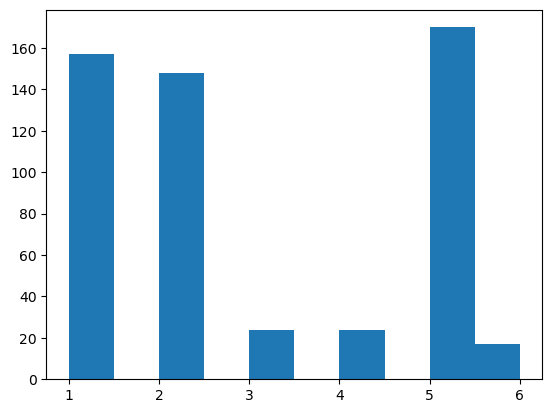

In [37]:
#Sleep	Appetite	Interest	Concentration	Agitation	Sleep Disturbance	Panic Attacks	Hopeles
plt.hist(x=dff['Sleep'])

(array([170.,   0., 148.,   0.,   0.,  26.,   0.,  24.,   0., 172.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

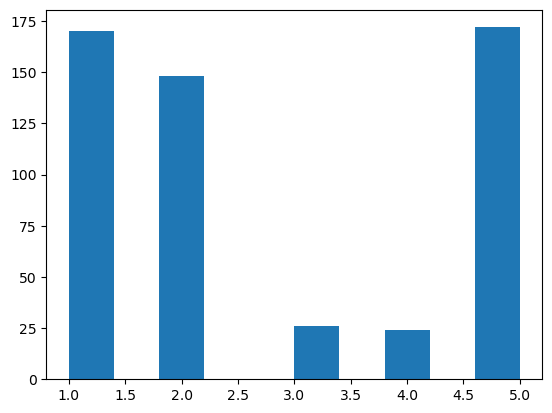

In [38]:
plt.hist(x=dff['Appetite'])

(array([170.,   0., 148.,   0.,   0.,  24.,   0.,  24.,   0., 174.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

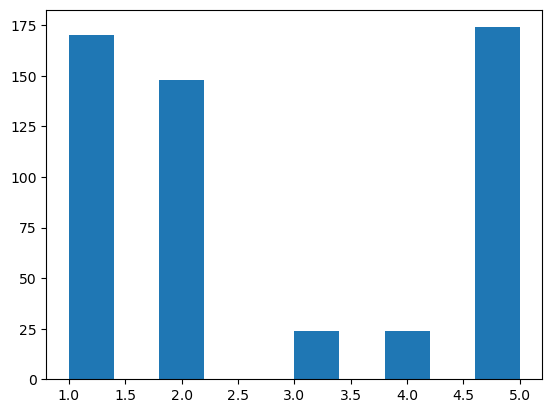

In [39]:
plt.hist(x=dff['Interest'])

(array([168.,   0., 152.,   0.,   0.,  24.,   0.,  24.,   0., 172.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

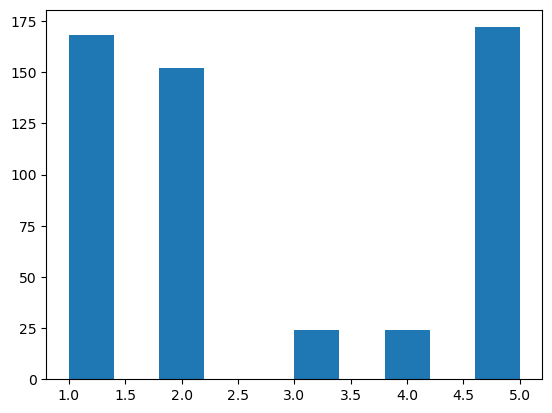

In [40]:
plt.hist(x=dff['Concentration'])

(array([141.,   0., 158.,   0.,  26.,   0.,  24.,   0., 174.,  17.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

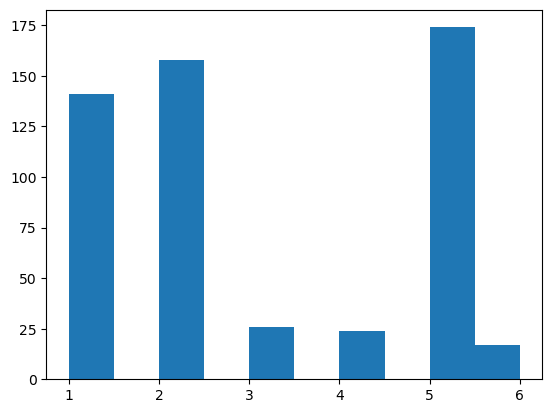

In [41]:
plt.hist(x=dff['Agitation'])

(array([156.,   0., 162.,   0.,   0.,  26.,   0.,  24.,   0., 172.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

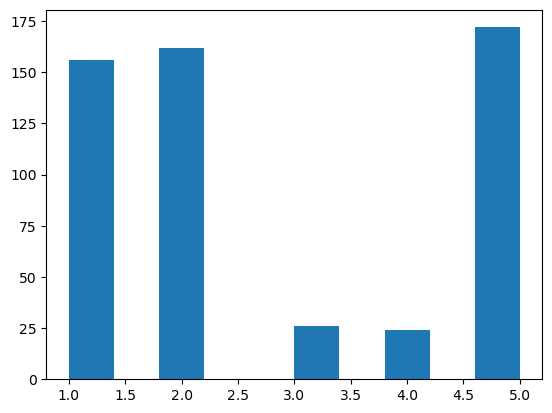

In [42]:
plt.hist(x=dff['Sleep Disturbance'])

(array([133.,   0., 166.,   0.,  24.,   0.,  26.,   0., 174.,  17.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

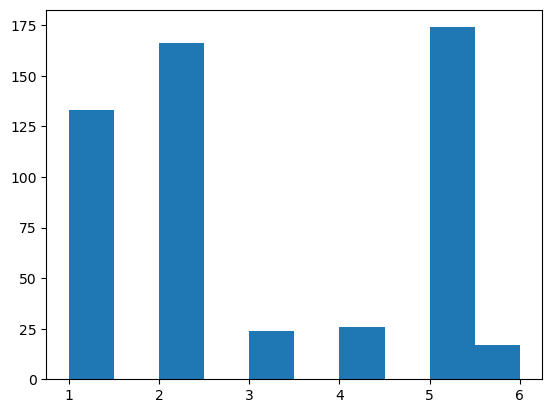

In [43]:
plt.hist(x=dff['Panic Attacks'])

(array([170.,   0., 148.,   0.,   0.,  24.,   0.,  24.,   0., 174.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

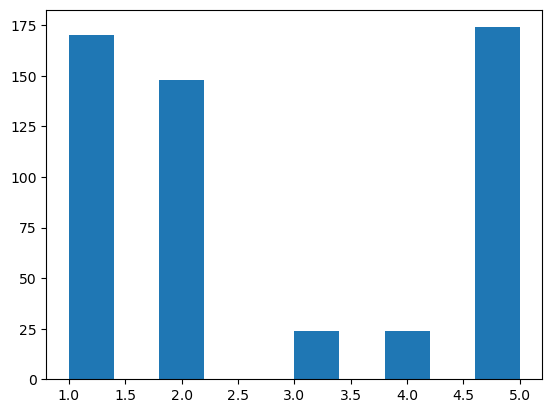

In [44]:
plt.hist(x=dff['Interest'])

### Stage9: Utilization of Analysis results
The results can be used to find out the depression level of the individual based on the other variables.

### Conclusion
This project aims to develop a reliable model for detecting depression. We applied machine learning to the classification of depression levels of individuals, which involved data pre-processing, cleaning, validation, extraction, and analysis. By using predictive analytics, we perform effective classification to determine depression levels. It also involved StandardScaler for feature scaling, mapping the target variable, and classification using SVC. Finally, we used a confusion matrix to find the evaluation metrics of the model.

### Future work
This model can be integrated with the healthcare systems in assisting treatment and observing depression. Also, it can be combined with the existing mobile mental health applications in the assessment of depression and providing precautionse.
